# Síntesis de redes no disipativas simplemente cargadas
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

## Resumen 
En este notebook se presenta un método sistemático para sintetizar cuadripolos con solo un puerto cargado. Esto puede darse de dos maneras: al cargar el puerto de salida, ó al conectar un *generador real* a la entrada del cuadripolo. Se analizarán dos ejemplos de transferencias, con sus respectivas verificaciones y simulaciones circuitales.

* Funciones de dibujo de redes: [dibujar_puerto_entrada](), [dibujar_funcion_exc_abajo](), [dibujar_elemento_derivacion](), [dibujar_espacio_derivacion](), [dibujar_elemento_serie]()
* Funciones de síntesis de dipolos: [remover_polo_infinito](), [remover_valor_en_infinito]()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


## Introducción

En el [notebook anterior](ejnb_funciones_transf_descargadas.ipynb) se analizó el problema de la síntesis de una red eléctrica (modelada como un cuadripolo lineal) en la situación particular de tener **ambos puertos descargados**. Esto quiere decir que por cada puerto se tendrá una corriente ó tensión igual a cero, pero dado que se busca establecer una relación entrada-salida, nunca ambas a la vez. Ciertamente tener corriente nula coincide con la situación extrema de carga conocida como circuito abierto, y puede darse debido a dos situaciones en este contexto: 1) por un generador de corriente pasivado, o 2) por una admitancia nula como carga. Por otro lado, tener tensión igual a cero en un puerto se entiende como un cortocircuito, y se dará cuando un generador de tensión esté pasivado, o cuando la carga sea de resistencia nula.

En este documento se presentará una metodología sistemática para sintetizar redes **no disipativas** que satisfagan una transferencia en la condición de tener solo un puerto cargado. En contraposición, un puerto cargado puede darse en la situación de conectar una carga finita ó un generador real. En caso de buscar una transferencia simplemente cargada, se podrán dar cuatro posibilidades

![sint_simple](./img/sint_simple.png)

Entonces dependiendo el tipo de generador real (columna izquierda) ó carga, y el tipo de transferencia requerido, dará lugar a expresiones matemáticas que, curiosamente,  comparten la siguiente forma matemática

$$
T = \frac{F_T}{1 + F_E}
$$

Es decir que una transferencia $T$ dependerá del cociente entre un parámetro transferencia (como $Z_{21}$) y un denominador que depende de una inmitancia de entrada o salida (como $Z_{11}$ ó $Z_{22}$). Esta similitud entre todas las transferencias simplemente cargadas justifica el método sistemático que se presentará a continuación. A modo de ejemplo se calcularán primero dos transferencias, dejando el resto para ejercitación de cada estudiante.

#### Ejemplo 1: Transimpedancia con carga en la entrada

Para la siguiente configuración de cuadripolo cargado 

![sint_simple_ej1](./img/sint_simple_gen_corr.png)

se pide la transferencia de impedancia

$$ Z = \frac{V_2}{I_G}\Bigg\vert_{I_2 = 0} $$

que se puede factorizar en dos partes, lo que permiten ganar cierta perspectiva

$$ Z = \left( \frac{I_1}{I_G} \cdot \frac{V_2}{I_1} \right)  \Bigg\vert_{I_2 = 0} $$

ya que se mantienen las condiciones de medición de la transferencia $Z$, pero se identifica un divisor de corriente antes del cuadripolo

$$ \frac{I_1}{I_G} \Bigg\vert_{I_2 = 0} = \frac{ 1/Z_{11} }{1/Z_{11} + 1/R_G} $$

prestar atención que $Z_{11}$ será la impedancia que verá el generador de corriente, ya que su condición de medición coincide con la de la propia transferencia $Z$. Luego el otro factor es justamente el parámetro $Z_{21}$ por la misma razón. Entonces resulta

$$ Z = \frac{Z_{21}}{1 + Z_{11} / R_G} $$

lo cual respeta la forma matemática que indicamos más arriba. Veremos a continuación un último ejemplo con carga en la salida.

#### Ejemplo 2: Transadmitancia con carga a la salida

En este caso tenemos

![sint_simple_ej1](./img/sint_simple_v1_carga.png)

y se pide la siguiente transferencia

$$ Y = \frac{(-I_2)}{V_1} $$

en este caso, la restricción la tenemos en la salida dado que la carga impone para $V_2$

$$ V_2 = (-I2) \cdot R_L, $$

mientras que la transferencia $Y$ indica que la excitación estará dada por un generador $V_1$ en el puerto de entrada. Siendo que $V_1$ será la variable independiente en el cuadripolo, los parámetros admitancia nos servirán para hallar $Y$ en función de los parámetros admitancia del cuadripolo. Esto se debe a que respetan la misma restricción, es decir tensiones libres y corrientes dependientes.  Luego de la ecuación del puerto de salida de los parámetros admitancia se sabe que

$$ I_2 = Y_{21} \cdot V_1 + Y_{22} \cdot V_2 $$

entonces resolviendo para 

$$ Y = \frac{(-I_2)}{V_1}\Bigg\vert_{V_2 = (-I2) \cdot R_L} = \frac{(-Y_{21})}{1 + Y_{22} \cdot R_L} $$

se obtiene una expresión de la transferencia que respeta la forma matemática que se anticipó.

## Una metododología sistemática de síntesis

Habiendo analizado dos transferencias simplemente cargadas, se nota que si elegimos como norma de impedancia la resistencia de generador o de carga, las expresiones son notablemente parecidas a 

$$
T = \frac{F_T}{1 + F_E}\, ,
$$

y del mismo modo, pensando a 

$$T = \frac{P}{Q}$$

como un cociente de polinomios $P$ y $Q$. Al vincular ambas expresiones, y conociendo las restricciones de las funciones transferencia ($F_T$ **estables**) y especialmente las de las funciones de excitación ($F_E$ **no disipativas** y **realizables**). En consecuencia, las $F_E$ serán necesariamente un cociente 

$$ \frac{N_Q}{M_Q} \vee \frac{M_Q}{N_Q} $$

recordando que el polinomio $Q= M_Q + N_Q$, tendrá una parte par $M_Q$ y otra impar $N_Q$. Entonces podemos reeformular $T$ como

$$
\frac{\frac{P}{M_Q}}{1 + \frac{N_Q}{M_Q}} \vee \frac{\frac{P}{N_Q}}{1 + \frac{M_Q}{N_Q}}
$$

Llegado a este punto surge una pregunta razonable, si ambas funciones son igualmente válidas *¿cómo optar por alguna de ellas?*. Kuo en su libro justifica que se deberá elegir la parte que haga que el parámetro transferencia $F_T$ **sea impar**. Es decir que si $P$ es un polinomio par, elegiremos $N_Q$ y si fuera impar, sacaremos factor común $M_Q$ en el denominador $Q$.

Una vez resuelta la forma matemática de $T$, procedemos a sintetizar la $F_E$ no disipativa, respetando que las remociones se realicen a las frecuencias indicadas por los ceros de la transferencia $T$. 

Como es habitual finalizaremos el notebook con un ejemplo.

### Referencias

1. [Kuo, F. *Network Analysis and Synthesis*.](https://drive.google.com/file/d/1WZEsKhywwb5SJqR7fEId6gJI8eIU8dB-/view?usp=drive_link)


### Ejemplo 1: Transimpedancia cargada a la entrada

Sintetice una transimpedancia como la analizada anteriormente, que cumpla con

![sint_simple_ej1](./img/sint_simple_gen_corr.png)

$$ Z = \frac{V_2}{I_G}\Bigg\vert_{I_2 = 0} = \frac{k \cdot (s^2 + 9)}{s^3 + 2s^2 + 2s + 1} $$

en este caso el numerador es un polinomio par, por lo tanto optamos por elegir la parte impar de $Q$

$$ Z = \frac{\frac{s^2 + 9}{s^3 + 2s}}{1 + \frac{2s^2 + 1}{s^3 + 2s}} = \frac{Z_{21}}{1 + Z_{11} / R_G}$$

luego resulta que si $R_G = 1$, entonces

$$ Z_{11} = \frac{(2s^2+1)}{(s^3+2s)} $$ 

y

$$ Z_{21} = \frac{(s^2+9)}{(s^3+2s)} $$ 

Notar la similitud de las funciones matemáticas con las utilizadas en el [notebook anterior.](ejnb_funciones_transf_descargadas.ipynb) Dado que las funciones matemáticas son las mismas, también lo será el método gráfico resultante. Lo que cambiará son los componentes resultantes de cada remoción (serán los duales). Dejamos como ejercicio para quien esté interesado repetir el método gráfico y procedemos con el método analítico en PyTC2.

In [1]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_infinito, remover_polo_jw, isFRP

from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

# Importante importar símbolos de variables 
from pytc2.general import s


In [2]:
# Sea la siguiente función de excitación
Z11 = (2*s**2+1)/(s**3+2*s)
Z21 = (s**2+9)/(s**3+2*s)

print_subtitle('Impedancias del Ejemplo')

print_latex(a_equal_b_latex_s('Z_{11}', Z11))
print_latex(a_equal_b_latex_s('Z_{21}', Z21))


#### Impedancias del Ejemplo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
print_subtitle('1º Remoción parcial en $\infty$')

omega_L2C2 = 3

Y2, YC1 = remover_polo_infinito(1/Z11, omega_zero = omega_L2C2 )

# YC1 es la admitancia removida
# extraigo C1
C1 = YC1/s

print_latex(a_equal_b_latex_s('Y_{C1} = k_\infty \cdot s', YC1))
print_latex(a_equal_b_latex_s('C_1', C1))
print_latex(a_equal_b_latex_s('Y_2', Y2))


#### 1º Remoción parcial en $\infty$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
print_subtitle('2º Remoción total en $\omega = 3$')

Z4, Zt2, L2, C2 = remover_polo_jw(1/Y2, isImpedance = True, omega = omega_L2C2 )

print_latex(a_equal_b_latex_s('Z_{{t2}} = \\frac{{2 k \\cdot s}}{{s^2+ {:d}^2}}'.format(omega_L2C2), Zt2))
print_latex(a_equal_b_latex_s('L_2', L2))
print_latex(a_equal_b_latex_s('C_2', C2))
print_latex(a_equal_b_latex_s('Z_4', Z4))


#### 2º Remoción total en $\omega = 3$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
print_subtitle('3º Remoción total en $\infty$')

# extraigo finalmente C3
C3 = 1/Z4/s

print_latex(a_equal_b_latex_s('C_3', C3))


#### 3º Remoción total en $\infty$

<IPython.core.display.Math object>

Ahora se dibujará la red sintetizada para proceder a la verificación.

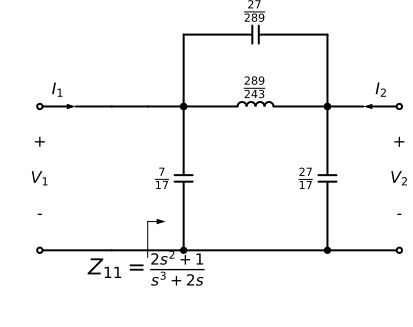

In [6]:
from pytc2.dibujar import dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_serie, dibujar_funcion_exc_abajo
from schemdraw import Drawing

# Red ejemplo 1
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V_1$', '-'), 
                        current_lbl = '$I_1$')

d = dibujar_funcion_exc_abajo(d, 
                 'Z_{11}',  
                 Z11, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, 'C', C1)

d = dibujar_tanque_serie(d, inductor_label=L2, capacitor_label=C2)

#d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, 'C', C3)


d = dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V_2$', '-'), 
                        current_lbl = '$I_2$')

display(d)

### Verificación

Una verificación evidente es a partir de la matriz $Y$ de la red $\pi$ resultante, separada de las cargas impuestas en cada puerto. Una vez obtenida la matriz $Y_{\pi}$, obtenemos la $Z_{Tee}$ con lo que se concluye la verificación.

Recordar que este método de síntesis no impuso restricciones sobre $Z_{22}$ ni sobre la escala de $Z_{21}$, es decir que la red que se sintetizó tendrá un $Z_{21}^{"}$ que respeta proporcionalidad con el prescrito $k_{21} \cdot Z_{21}^{"} = Z_{21}$

In [7]:
from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice

Ya = YC1
Yb = 1/Zt2
Yc = 1/Z4

Ypi = sp.expand(sp.simplify(sp.Matrix([[Ya+Yb, -Yb], [-Yb, Yc+Yb]])))
Ztee = Ypi**-1
print_latex(a_equal_b_latex_s('Z_T = Y^{-1}_{\\pi}', Ztee))
print_latex(a_equal_b_latex_s('k_{{21}} \\cdot Z^{{"}}_{{T \\, 21}}', Z21))
k_21 = sp.simplify(sp.expand(Z21 / Ztee[0,1]))
print_latex(a_equal_b_latex_s('k^{{"}}_{{21}}', k_21))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Esto podría finalizar la verificación, aunque se aprovechará el ejemplo para mostrar otra manera de verificar la transimpedancia directamente, en lugar de los parámetros del cuadripolo de forma aislada.

Para ello calcularemos el modelo ABCD de la siguiente cascada de cuadripolos, para quedarnos solamente con el parámetro $C$

$$ Z = \frac{1}{C} = \frac{V_2}{I_G}\Bigg\vert_{I_2 = 0} $$


In [8]:
from pytc2.cuadripolos import TabcdZ_s, TabcdY_s


T_Ya = TabcdY_s(1+s*C1)
T_Zt2 = TabcdZ_s(Zt2)
T_Yc = TabcdY_s(s*C3)

T_tot = T_Ya * T_Zt2 * T_Yc

print_latex(a_equal_b_latex_s('Z', sp.simplify(sp.expand(1/T_tot[1,0] ))))


<IPython.core.display.Math object>

Notar que en la transferencia total ya figura el factor $1/k^{"}_{21}$. 

Se finaliza la verificación con una simulación circuital en LTspice. 

![LTspice](./img/sint_simple_cargada_ltspice1.png)

Lo primero en que nos centraremos es en la verificación de los parámetros $Z_{11}$ y $Z_{21}$. Para ello analizamos una red descargada como la que se sintetizó, sin el generador real de corriente.

Prestar atención a que se utiliza una norma de frecuencia para facilitar la verificación numérica de $Z_{11}$ con  polos en $\omega = (0, \sqrt{2})$ y cero en $\omega = \sqrt{2}/2$. Mientras que $Z_{21}$ verifica la localización de sus ceros en $\omega = (3, \infty)$. Notar que $Z_{11}$ no tiene polos privados.

Otro aspecto distintivo de esta síntesis es que buscamos verificar una transferencia que incluye a la carga en el puerto de entrada, y debe verificarse una transferencia muy concreta

$$ Z = \frac{V_2}{I_G}\Bigg\vert_{I_2 = 0} $$

Para ello simulamos una red que incluya el generador real de entrada

![LTspice](./img/sint_simple_cargada_ltspice2.png)

y calculamos la transimpedancia requerida, que es proporcional a la tensión de salida, dado que el generador de entrada es unitario.

#### Ejemplo 2: Transadmitancia con carga a la salida

Sea el esquema del cuadripolo

![sint_simple_ej1](./img/sint_simple_v1_carga.png)

y se pide la misma transferencia

$$ Y = \frac{(-I_2)}{V_1} = \frac{k \cdot (s^2 + 9)}{s^3 + 2s^2 + 2s + 1} $$

recordando que ya se calculó

$$ Y = \frac{(-I_2)}{V_1}\Bigg\vert_{V_2 = (-I2) \cdot R_L} = \frac{(-Y_{21})}{1 + Y_{22} \cdot R_L} $$

salvo que para este caso, si $R_L = 1$, entonces resulta

$$ Y_{22} = \frac{(2s^2+1)}{(s^3+2s)} $$ 

y

$$ Y_{21} = \frac{(s^2+9)}{(s^3+2s)} $$ 

En este caso, el problema de síntesis es **exactamente el mismo** que en el [notebook anterior.](ejnb_funciones_transf_descargadas.ipynb) Por lo tanto, referimos a quién se interese en la síntesis a revisar los detalles en el enlace, retomando la verificación de la transadmitancia cargada.

### Verificación

En el notebook anterior se sintetizó una red Tee que cumplía adecuadamente con los parámetros del cuadripolo descargado. En este caso, al agregarle la carga a la salida, los parámetros que debe cumplir el cuadripolo son idénticos, por lo tanto, al conectar una carga normalizada en el puerto de salida y excitar con un generador de tensión en la entrada, se debería verificar la transadmitancia prescrita. Aprovechamos la oportunidad de verificar la transadmitancia mediante los parámetros ABCD. Recordando que

$$ Y = \frac{(-I_2)}{V_1}\Bigg\vert_{V_2 = (-I2) \cdot R_L} $$

Prestar atención que $I_2$ es la corriente que circula por la $R_L$, entonces si planteamos la cascada de la red escalera debería ser (ver esquemático en LTspice más abajo)

$$ T_T = T_{ZL1} \cdot T_{YL2C2} \cdot T_{ZL3} \cdot T_{YRL} $$

Luego para el cuadripolo resultante, resultaría razonable obtener el parámetro B que es

$$ B = \frac{V_1}{(-I_2)}\Bigg\vert_{V_2 =0} $$

para luego usar $Y = 1/B$ y obtener la transferencia buscada. Esto tiene un sutil problema, que tiene que ver con la condición de medición del parámetro $B$. Notar que $V_2=0$ implicaría la anulación de la admitancia de carga $Y_{RL}$. Entonces, para que el parámetro $1/B$ sea idéntico a $Y$, las condiciones de medición deberían ser compatibles, o $I_2$ del cuadripolo total debería ser la corriente que circule por $R_L$. Podemos solucionar este inconveniente si consideramos el cuadripolo terminal de carga como una impedancia en serie $T_{ZRL}$, de esta manera al imponerse la condición de cortocircuito, la corriente $I_2$ circula por $R_L$. Entonces la interconexión será

$$ T_T = T_{ZL1} \cdot T_{YL2C2} \cdot T_{ZL3} \cdot T_{ZRL} $$

para luego verificar

$$ Y = \frac{1}{B} \Bigg\vert_{V_2 = 0} $$


In [10]:
# Notar que el valor de los componentes es el mismo entre las redes duales

T_Za = TabcdZ_s(s*C3)
T_Yt2 = TabcdY_s(Zt2)

## Atención acá abajo ... leer párrafo anterior
RL = 1
T_Zc = TabcdZ_s(s*C1 + RL)

T_tot = T_Za * T_Yt2 * T_Zc

print_latex(a_equal_b_latex_s('Y', sp.simplify(sp.expand(1/T_tot[0,1] ))))


<IPython.core.display.Math object>

Finalmente, se carga la red Tee en LTspice obteniendo la transadmitancia pasabajo normalizada ($f_C = 1$ Hz), con un cero de transmisión en $f = 3$ Hz como anticipaba la verificación.

![LTspice](./img/sint_simple_cargada_ltspice3.png)


Con este ejemplo se finaliza el documento.